In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('Final_Product_Data.csv')

In [16]:
data.columns

Index(['Date', 'Product Name', 'Price', 'Quantity Sold', 'Total'], dtype='object')

In [17]:
# Convert the 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Set 'Date' as the index if it's not already
data.set_index('Date', inplace=True)

# Now, filter the data to only include records up to 2024-04-28
filtered_data = data.loc[data.index <= '2024-04-28']

# Display the filtered data to ensure it's correct
print(filtered_data.tail())


                   Product Name  Price  Quantity Sold  Total
Date                                                        
2024-04-28  Glass 200ml (Steel)     30              1     30
2024-04-28     Plastic Fork set     40              2     80
2024-04-28      Fork (Singular)     15              1     15
2024-04-28  Glass 200ml (Steel)     30              2     60
2024-04-28               Peeler     20              2     40


In [19]:
data['DayOfWeek'] = data.index.day_name()

# Create dummy variables for 'DayOfWeek'
data = pd.get_dummies(data, columns=['DayOfWeek'], drop_first=True)

# Display the updated data
print(data.head())


                Product Name  Price  Quantity Sold  Total  DayOfWeek_Monday  \
Date                                                                          
2024-01-01     Kadhai medium    450              2    900              True   
2024-01-01      Kadhai small    350              1    350              True   
2024-01-01         Knife Set    250              2    500              True   
2024-01-01      Kadhai small    350              3   1050              True   
2024-01-01  Plastic Fork set     40              2     80              True   

            DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
Date                                                                   
2024-01-01               False             False               False   
2024-01-01               False             False               False   
2024-01-01               False             False               False   
2024-01-01               False             False               False   
2024-01-01    

In [20]:
# Define the independent variables (X) and dependent variable (y)
X = data.drop(columns=['Total', 'Product Name'])  # We drop 'Total' because it's our target, and 'Product Name' because it's not numeric
y = data['Total']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2638, 8) (660, 8) (2638,) (660,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 19455.702032704085
R² Score: 0.8522525957691615


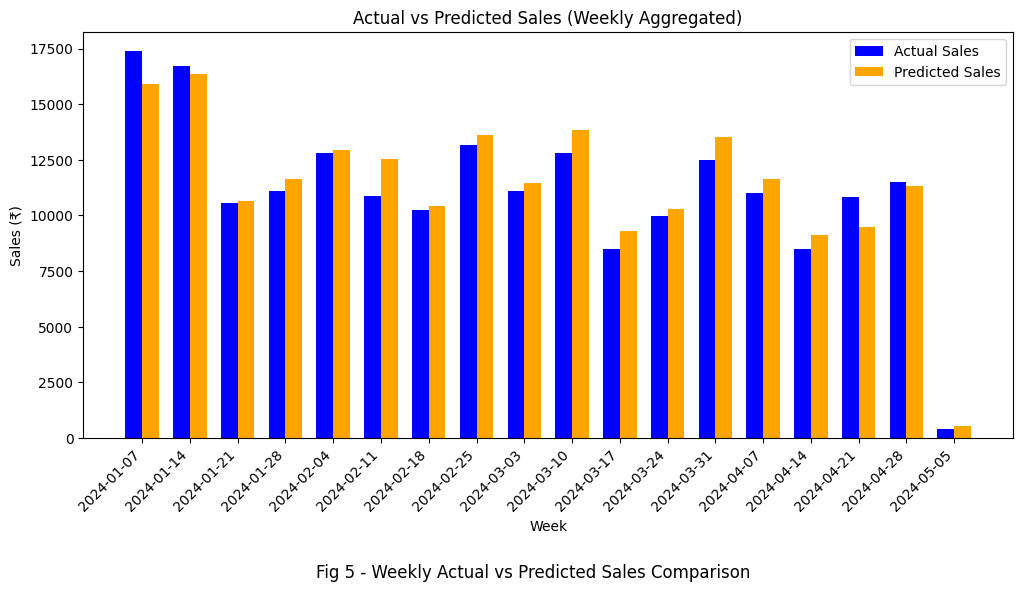

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate the actual and predicted sales by week
actual_sales_weekly = y_test.resample('W').sum()
predicted_sales_weekly = pd.Series(y_pred, index=y_test.index).resample('W').sum()

# Set up the positions for the bars
bar_width = 0.35
index = np.arange(len(actual_sales_weekly))

# Create a bar plot to compare actual and predicted sales side by side
plt.figure(figsize=(12, 7))

# Plot actual sales
plt.bar(index, actual_sales_weekly, bar_width, label='Actual Sales', color='blue')

# Plot predicted sales next to actual sales
plt.bar(index + bar_width, predicted_sales_weekly, bar_width, label='Predicted Sales', color='orange')

# Improve the labels and title
plt.title('Actual vs Predicted Sales (Weekly Aggregated)')
plt.xlabel('Week')
plt.ylabel('Sales (₹)')

# Set the x-axis ticks and labels
plt.xticks(index + bar_width / 2, actual_sales_weekly.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

# Add the legend
plt.legend()

# Add the figure label below the plot
plt.figtext(0.5, 0.1, "Fig 5 - Weekly Actual vs Predicted Sales Comparison", ha="center", fontsize=12)

# Adjust the layout to ensure the label doesn't overlap with the plot
plt.subplots_adjust(bottom=0.3)

plt.show()
